# Analysis of Linear Time-Invariant Systems

## Spring-mass system

Damped harmonic oscillator: $u(t) - kx(t) - b\dot{x}(t) = m\ddot{x}(t)$, for double integrator case: k=0, b=0, m=1

Note the steady state position $x(\infty) = \frac u k$

$\omega_0 = \sqrt \frac k m$,  damping ratio: $\zeta  = \frac b {2 \sqrt {mk}}$ >1: overdamped, <1: underdamped

$x(t) = x_1$

$\dot{x}(t) = x_2 = \dot{x_1}$

$u(t) = u1$

Now, the space state equation becomes: $u - kx_1 -bx_2 = m\dot x_2$

$\dot x_1 = 0 x_1 + 1 x_2 + 0 u_1$

$\dot x_2 = - \frac k m x_1 - \frac b m x_2 + \frac 1 m u_1$

for y:   $y = 1 x_1 + 0 x_2 + 0 u$

We need to write it in state space form:

$\dot x = Ax + Bu$

$y = Cx + Du$

$A = \begin{bmatrix} 0 & 1 \\- \frac k m & - \frac b m\\ \end{bmatrix}$,
$B = \begin{bmatrix} 0 \\ \frac 1 m \end{bmatrix}$,
$C = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, D = 0 $

In [116]:
import numpy as np
from scipy import signal
%matplotlib inline
import matplotlib.pyplot as plt

In [117]:
def spring_mass_system(mbk):
    m,b,k = mbk
    ssA = [[0., 1.], [-k/m, -b/m]]
    ssB = [[0.], [1./m]]
    ssC = [[1., 0.]]
    ssD = 0.
    return signal.lti(ssA,ssB,ssC,ssD)
def spring_mass_zeta(mbk): 
    return mbk[1]/2./np.sqrt(mbk[0]*mbk[2])
def spring_mass_omega(mbk): 
    return np.sqrt(mbk[2]/mbk[0])
def spring_mass_zpk(mbk):
    return signal.tf2zpk([1.],[m,b,k])   

poles((1.0, 0.5, 1.0): [-0.25+0.96824584j -0.25-0.96824584j]
omega,zeta((1.0, 0.5, 1.0): 1,0.25
poles((16.0, 8.0, 1.0): [-0.25 -0.25]
omega,zeta((16.0, 8.0, 1.0): 0.25,1
poles((16.0, 2.0, 1.0): [-0.0625+0.24206146j -0.0625-0.24206146j]
omega,zeta((16.0, 2.0, 1.0): 0.25,0.25


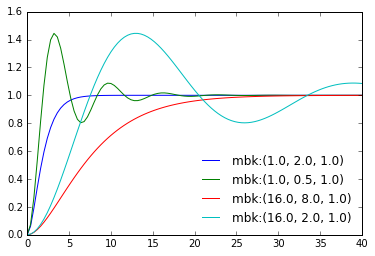

In [130]:
t = np.linspace(0, 40,101)
u = np.ones_like(t)
mbk = 1., 2., 1. # omega,zeta: 1,1
tout, y0, x = signal.lsim(spring_mass_system(mbk), u, t)
plt.plot(tout, y0, label='mbk:'+str(mbk))
mbk = 1., .5, 1. # omega,zeta: 1.0,0.25
#print spring_mass_zpk(mbk)
print('poles('+str(mbk)+': '+str(spring_mass_system(mbk).poles))
print('omega,zeta('+str(mbk)+': %0.4g,%0.4g'%(spring_mass_omega(mbk),spring_mass_zeta(mbk)))
tout, y1, x = signal.lsim(spring_mass_system(mbk), u, t)
plt.plot(tout, y1, label='mbk:'+str(mbk))
mbk = 16.,8.,1.
print('poles('+str(mbk)+': '+str(spring_mass_system(mbk).poles))
print('omega,zeta('+str(mbk)+': %0.4g,%0.4g'%(spring_mass_omega(mbk),spring_mass_zeta(mbk)))
tout, y2, x = signal.lsim(spring_mass_system(mbk), u, t)
plt.plot(tout, y2, label='mbk:'+str(mbk))
mbk = 16.,2.,1.
print('poles('+str(mbk)+': '+str(spring_mass_system(mbk).poles))
print('omega,zeta('+str(mbk)+': %0.4g,%0.4g'%(spring_mass_omega(mbk),spring_mass_zeta(mbk)))
tout, y2, x = signal.lsim(spring_mass_system(mbk), u, t)
plt.plot(tout, y2, label='mbk:'+str(mbk))
plt.legend(loc='lower right', frameon=False)
plt.show()

----------------------------------------------------------------------
## RLC Cirquit

![title](rlc.png)

$V_L = L\frac {\partial i}{\partial t}$,
$i = C\frac {\partial V_C}{\partial t}$

Ohm equation: $V = iR + L \frac{\partial i}{\partial t} + V_C$

Note, this is equivalent to spring-mass with m = LC, b = RC, k = 1

State vectors:

$x = \begin{bmatrix} V_C \\ i \\ \end{bmatrix}$ , $y = \begin{bmatrix} x_1 \\ Rx_2 \\ \end{bmatrix}$

State equations

$ \frac{\partial i}{\partial t} = \frac 1 L u - \frac R L i - \frac 1 L V_C$

$ \frac {\partial V_C}{\partial t} = \frac 1 C i$

We need to write it in state space form:

$\dot x = Ax + Bu$

$y = Cx + Du$

$ \dot x_1 = 0 x_1 + \frac 1 C x_2 + 0u $

$ \dot x_2 = - \frac 1 L x_1 - \frac R L x_2 + \frac 1 L u$


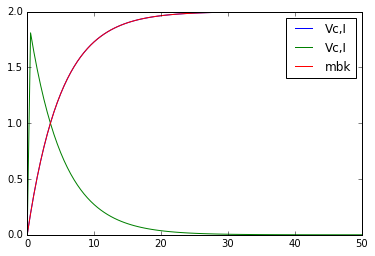

In [64]:
R,L,C = 50., 1.e-3, 1.e-1
ssA = [[0., 1./C], [-1./L, -R/L]]
ssB = [[0.], [1./L]]
ssC = [[1., 0.],[0., R]]
ssD = [[0.],[0.]]
system = signal.lti(ssA,ssB,ssC,ssD)
#print system.poles
t = np.linspace(0, 50,101)
u = np.ones_like(t)*2
tout, y, x = signal.lsim(system, u, t)
plt.plot(tout, y, label='Vc,I')
# compare with spring-mass system
mbk = L*C,R*C,1
tout, y1, x1 = signal.lsim(spring_mass_system(mbk), u, t)
plt.plot(tout, y1, label='mbk')
plt.legend()
plt.show()
#print y

zeros,poles:(array([-0.15+0.69101375j, -0.15-0.69101375j]), array([], dtype=float64))
omega,zeta((2.0, 0.6, 1.0): 0.7071,0.2121


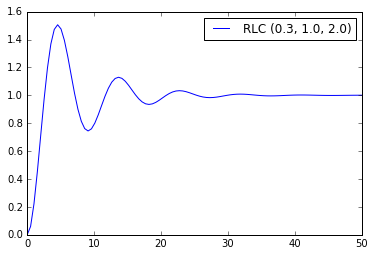

In [132]:
#R,L,C = 50., 1.e-3, 1.e-1 # poles -5e4, -0.2
#R,L,C = .6, 2.,1.
R,L,C = .3, 1.,2.
mbk = L*C,R*C,1.
t = np.linspace(0, 50,100)
u = np.ones_like(t)*1
system = spring_mass_system(mbk)
print('zeros,poles:'+str((system.poles,system.zeros)))
print('omega,zeta('+str(mbk)+': %0.4g,%0.4g'%(spring_mass_omega(mbk),spring_mass_zeta(mbk)))
tout, y, x = signal.lsim(system, u, t)
plt.plot(t, y, label='RLC '+str((R,L,C)))
plt.legend()
plt.show()

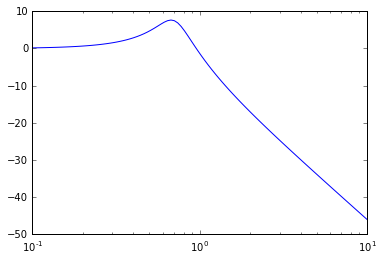

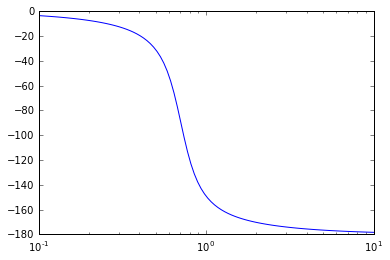

In [23]:
w, mag, phase = system.bode()
plt.figure()
plt.semilogx(w, mag)
plt.figure()
plt.semilogx(w, phase)
plt.show()

 # PID

Transfer function of PID and Plant: $G=\frac{G_1G_2}{G_1G_2+1}$

TF of PID: $\frac{K_ds^2+K_ps+K_i}s$

Transfer function of spring-mass + PID = $\frac {K_ds^2+K_ps+K_i} {ms^3+(b+K_d)s^2+(k+K_p)s+K_i}$ 

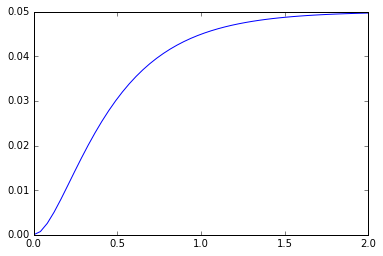

In [90]:
# Let's take spring-mass system
mbk = 1., 10., 20. # PID parameters Kp, Ki, Kd = 350., 300., 50.
#m, b, k = 2., 0.6, 1.
system = spring_mass_system(mbk)
#print system.poles
t = np.linspace(0, 2)
u = np.ones_like(t)
initial_state = [0.,0.]
tout, y, x = signal.lsim(system, u, t, X0=initial_state)
plt.plot(t, y)
plt.show()

In [91]:
def pid_spring_mass(mbk,pid):
    if pid[1] == 0.:
        controller_type = 'P/PD'
        num = [pid[2], pid[0]]
        den = [mbk[0], mbk[1] + pid[2], mbk[2] + pid[0]]
    elif pid[2] == 0.:
        controller_type = 'PI/I'
        num = [pid[0], pid[1]]
        den = [mbk[0], mbk[1], mbk[2] + pid[0], pid[1]]
    else:
        controller_type = 'PID'
        num = [pid[2], pid[0], pid[1]]
        den = [mbk[0], mbk[1] + pid[2], mbk[2] + pid[0], pid[1]]
    print('controller:'+controller_type+', zeros,poles,gain:\n '+str(signal.tf2zpk(num,den)))
    return signal.lti(num,den)

In [99]:
pid_spring_mass((1.,10.,20),(300.,0.,0.))

controller:P/PD, zeros,poles,gain:
 (array([], dtype=float64), array([-5.+17.17556404j, -5.-17.17556404j]), 300.0)


TransferFunctionContinuous(
array([ 300.]),
array([   1.,   10.,  320.]),
dt: None
)

controller:PID, zeros,poles,gain:
 (array([-6., -1.]), array([-53.14400655,  -5.89905365,  -0.9569398 ]), 50.0)


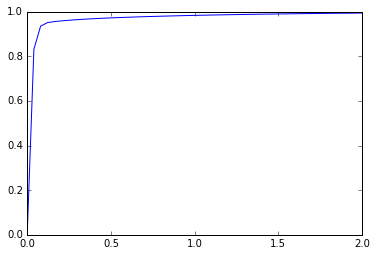

In [92]:
# PID with SMS(1,10,20)
mbk = 1., 10., 20.
pid = 350., 300., 50.
system = pid_spring_mass(mbk,pid)
t = np.linspace(0, 2, 51)
u = np.ones_like(t)
initial_state = [0.,0.]
tout, y, x = signal.lsim(system, u, t)#, X0=initial_state)
plt.plot(tout, y)
plt.show()

In [45]:
# Calculate PID for spring-mass system with poles:
def pid_of_mbk_with_poles(mbk,poles):
    m,b,k = mbk
    return (x[0]*x[1]+x[0]*x[2]+x[1]*x[2])*m - k, -x[0]*x[1]*x[2]*m, -(x[0]+x[1]+x[2])*m-b
poles = -100,-1.,-1
mbk = 1., 2., 1.
pid = pid_of_mbk_with_poles(mbk,poles)
print('pid='+str(pid)+' for mbk:'+str(mbk)+' with poles:'+str(poles))

pid=(array([-0.99983404, -0.99999963, -1.        ]), array([-0., -0., -0.]), array([-2.02582731, -2.00132306, -2.00003928])) for mbk:(1.0, 2.0, 1.0) with poles:(-100, -1.0, -1)


plant poles:[-1. -1.]
Ziegler-Nichols hint:[3.5999999999999996, 2.88, 1.125]
controller PID, zeros,poles,gain:
 (array([-1.6 +1.90827973e-08j, -1.6 -1.90827973e-08j]), array([-0.91762307+1.17938633j, -0.91762307-1.17938633j, -1.28975386+0.j        ]), 1.125)
controller PID, zeros,poles,gain:
 (array([-1., -1.]), array([-100. +0.00000000e+00j,   -1. +7.29839545e-09j,
         -1. -7.29839545e-09j]), 100.0)
controller PID, zeros,poles,gain:
 (array([-1.2236068, -0.7763932]), array([-3.97743974, -1.27070072, -0.75185953]), 4.0)


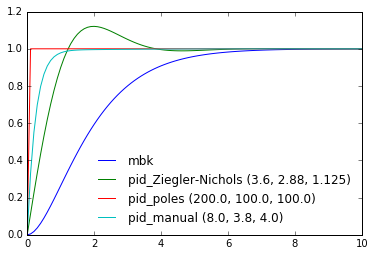

In [70]:
# PID with SMS(1, 2., 1.)
t = np.linspace(0, 10,101)
u = np.ones_like(t)*1.
X0 = [0.,0.]

#m,b,k = 1., 10., 20.
#pid = [350., 300., 50.] # PID controller is correct
#pid = [300., 0., 0.] # P controller is correct
#pid = [300., 0., 10.] # PD controller is correct
#pid = [30., 70., 0.] # PI is correct

mbk = 1, 2., 1.
print('plant poles:'+str(spring_mass_system(mbk).poles))
tout, y, x = signal.lsim(spring_mass_system(mbk), u, t, X0=X0)
plt.plot(tout, y,label='mbk')

#Ziegler-Nichols tuning
#pid = [10, 0., 0.]
#pid = [10., 3., 0.] # 3 oscillations
pid = [4., 0., 0.] # start of oscillations, Tu = 3
Ku = 4.; Tu = 3. # # it gives pid = 2.4, 1.6, 0.9
Ku, Tu = 6., 2.5 # it gives pid = 3.6, 2.88, 1.125
pid = [0.6*Ku, 1.2*Ku/Tu, 3.*Ku*Tu/40.]
print('Ziegler-Nichols hint:'+str(pid))

pid_zn = 3.6, 2.88, 1.125
toutzn, yzn, xzn = signal.lsim(pid_spring_mass(mbk,pid_zn), u, t)
plt.plot(toutzn, yzn, label='pid_Ziegler-Nichols '+str(pid_zn))

pid_neg_poles = 200., 100., 100. # pid for mbk-plant with poles -100,-1.,-1
tout1, y1, x1 = signal.lsim(pid_spring_mass(mbk,pid_neg_poles), u, t)
plt.plot(tout1, y1, label='pid_poles '+str(pid_neg_poles))

pid_manual = 8.0, 3.8, 4.
tout2, y2, x2 = signal.lsim(pid_spring_mass(mbk,pid_manual), u, t)
plt.plot(tout2, y2, label='pid_manual '+str(pid_manual))

plt.legend(loc='lower right', frameon=False)
plt.show()
# Summary: for SMS(1,2,1) the optimal pid is (8.0, 3.8, 4.)

# Discrete LTI

In [52]:
def discrete_spring_mass_system(mbk):
    m,b,k = mbk
    ssA = np.array([[0., 1.], [-k/m, -b/m]])
    ssB = np.array([[0.], [1./m]])
    ssC = np.array([[1., 0.]])
    ssD = np.array(0.)
    #csys = signal.lti(ssA,ssB,ssC,ssD)
    #print csys
    #dsys = signal.cont2discrete((csys,),0.5) # does not work
    dsys = signal.cont2discrete((ssA,ssB,ssC,ssD),0.5)
    return dsys

discrete system:(array([[ 0.90979599,  0.30326533],
       [-0.30326533,  0.30326533]]), array([[ 0.09020401],
       [ 0.30326533]]), array([[ 1.,  0.]]), array(0.0), 0.5)


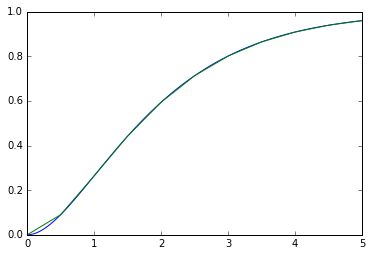

In [54]:
mbk = 1., 2., 1.
t = np.linspace(0, 5,101)
u = np.ones_like(t)
tout,yl,x = signal.lsim(spring_mass_system(mbk), u, t)
plt.plot(tout, yl)
dsys = discrete_spring_mass_system(mbk)
print('discrete system:'+str(dsys))
tout,yd = signal.dstep(dsys,t=t)
plt.plot(tout, y[0])
plt.show()

In [80]:
def discrete_pid_spring_mass(mbk,pid,dt=0.5):
    if pid[1] == 0.:
        # P or PD controller
        print 'P/PD'
        num = [pid[2], pid[0]]
        den = [mbk[0], mbk[1] + pid[2], mbk[2] + pid[0]]
    elif pid[2] == 0.:
        # PI or I controller
        print 'PI'
        num = [pid[0], pid[1]]
        den = [mbk[0], mbk[1], mbk[2] + pid[0], pid[1]]
    else:
        # PID controller
        print 'PID'
        num = [pid[2], pid[0], pid[1]]
        den = [mbk[0], mbk[1] + pid[2], mbk[2] + pid[0], pid[1]]
    print('zpk: '+str(signal.tf2zpk(num,den)))
    dsys = signal.cont2discrete((num,den),dt)
    return dsys

poles:[-1. -1.]
controller PID, zeros,poles,gain:
 (array([-1., -1.]), array([-100. +0.00000000e+00j,   -1. +7.29839545e-09j,
         -1. -7.29839545e-09j]), 100.0)
PID
zpk: (array([-1., -1.]), array([-100. +0.00000000e+00j,   -1. +7.29839545e-09j,
         -1. -7.29839545e-09j]), 100.0)


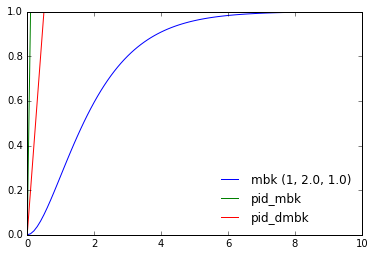

In [88]:
# PID with SMS(1, 2., 1.)
tmax,tstep = 10,0.1
t = np.linspace(0, tmax,tmax/tstep+1)
u = np.ones_like(t)*1.
X0 = [0.,0.]

mbk = 1, 2., 1.
lsys = spring_mass_system(mbk)
print('poles:'+str(lsys.poles))

#pid = [1., 1.9, .7] # hard to beat
#pid = [8.0, 3.8, 4.]
pid = [200., 100., 100.]

tout, y, x = signal.lsim(lsys, u, t, X0=X0)
plt.plot(tout, y, label='mbk '+str(mbk))
tout1, yl, x = signal.lsim(pid_spring_mass(mbk,pid), u, t)
plt.plot(tout1, yl, label='pid_mbk')
dsys = discrete_pid_spring_mass(mbk,pid,0.5)
tout1, yd = signal.dstep(dsys,t=t)
plt.plot(tout1, yd[0], label='pid_dmbk')
plt.legend(loc='lower right', frameon=False)
plt.show()
